# Steps Involved in Statistical Predictive Modelling
    A.Import Libraries&Data
    B.Preprocessing
    C.Exploratry Data Analysis
        1.Univariate Analysis
        2.Bivariate Analysis
        3.Missing Values
        4.Imputation
        5.Anomaly Detect
        6.Statistical Significance Test
        7.Multicollinearity
    D.Modelling
        1.Feature selection
        2.Feature Engineering
        3.Synthetic Sampling
        4.Normalization
        5.Model Building
        6.Cross Validation(Bias&Variance)
    E.Model Evaluation
        1.Confusion MAtrix
        2.Sensitivity
        3.Specificity
        4.F1-Score
        5.ROC
        6.Lift
        7.Gain
        8.Precision&Recall
        9.Gini-index
     F.Scoring the new Data


Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,Imputer
from sklearn.linear_model import LogisticRegression
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.core import Dropout
from  sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
Classifier=Sequential()
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
#models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import display
pd.options.display.max_columns = None
display()
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Importing Data

In [2]:
pwd

'C:\\Users\\tvimal\\Desktop\\hays'

In [3]:
Train_data=pd.read_csv('C:\\Users\\tvimal\\Desktop\\hays\\hr_attrition_train.csv')
Train_data.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,0,1,0,sales,low
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium
2,3,0.11,0.88,7,272,4,0,1,0,sales,medium
3,4,0.72,0.87,5,223,5,0,1,0,sales,low
4,5,0.37,0.52,2,159,3,0,1,0,sales,low


Set ID as INDEX

In [4]:
Train_data=Train_data.set_index('id')
Train_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
id,,,,,,,,,,
1,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.72,0.87,5,223,5,0,1,0,sales,low
5,0.37,0.52,2,159,3,0,1,0,sales,low


# Two Descrete input features are in integer data type 
Converting into Object Datatype 

In [5]:
Train_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
Train_data['Work_accident']=Train_data['Work_accident'].astype(object)
Train_data['promotion_last_5years']=Train_data['promotion_last_5years'].astype(object)

Shuffle the Data before incorporate into model

In [7]:
Train_data1 = shuffle(Train_data)
Train_data = shuffle(Train_data1)

Renaming output feature

In [8]:
Train_data=Train_data.rename(columns={'left':'TARGET'})
Train_data.TARGET.value_counts()

0    10217
1     2783
Name: TARGET, dtype: int64

In [9]:
Train_data.groupby('TARGET').agg('sum')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
TARGET,,,,,
0,6820.44,7315.20,38697,2033946,33285
1,1224.04,2002.02,10756,577881,10785


IMBALANCED DATA: Need SYNTHETIC SAMPLING

Checking for Null Values

In [10]:
display(Train_data.isnull().any())

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
TARGET                   False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

# EXPLORATORY DATA ANALYSIS

DESCRIPTIVE ANALYSIS  &  Univariate Analysis

In [11]:
Train_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,TARGET
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,0.618806,0.716709,3.804077,200.909769,3.390000,0.214077
std,0.246630,0.170237,1.209814,49.484224,1.312204,0.410196
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000
25%,0.450000,0.560000,3.000000,156.000000,3.000000,0.000000
50%,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000
75%,0.820000,0.870000,5.000000,244.000000,4.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001077DA90>,
      dtype=object)

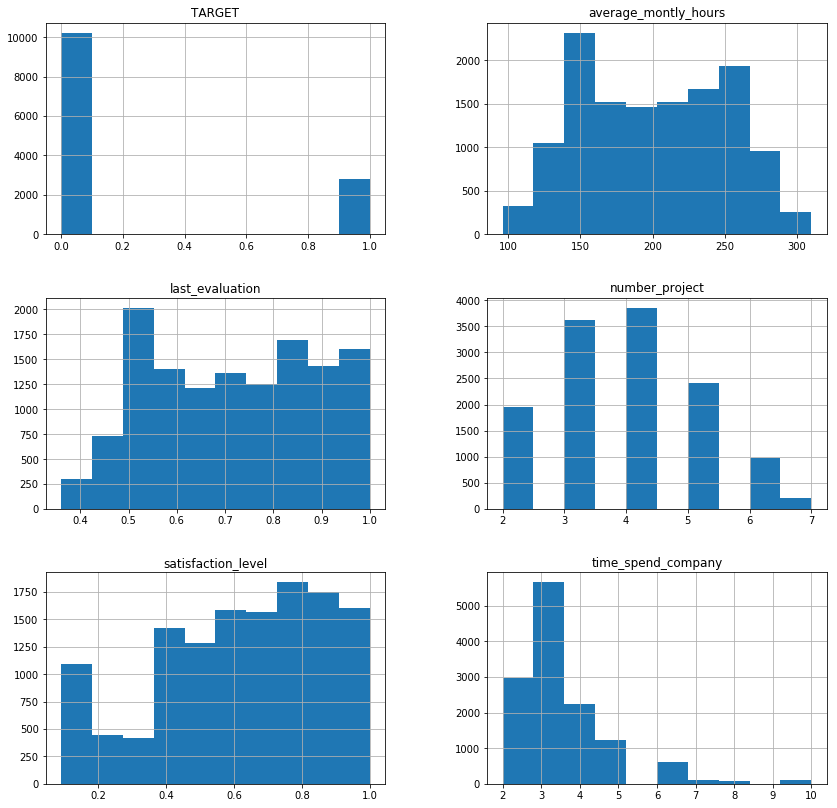

In [12]:
Train_data.hist(figsize = (14,14))

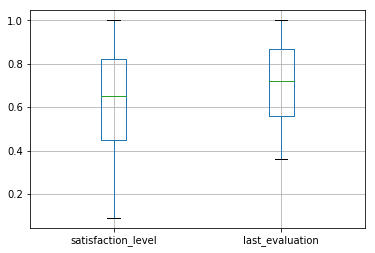

In [13]:
BP1=Train_data[['satisfaction_level', 'last_evaluation']]   
BP1.boxplot()

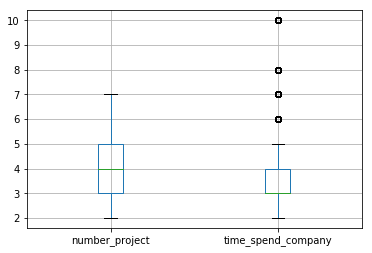

In [14]:
BP2=Train_data[['number_project','time_spend_company']]
BP2.boxplot()

# BIVARIATE  ANALYSIS

Counts in each Categorical features

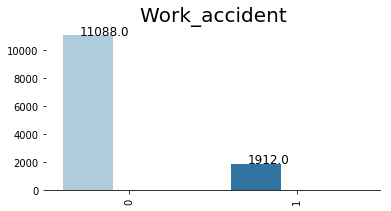

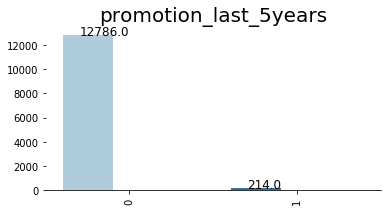

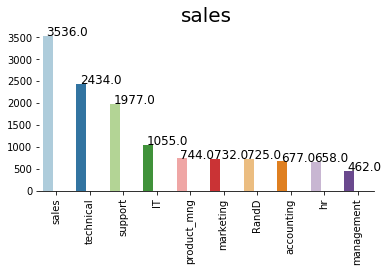

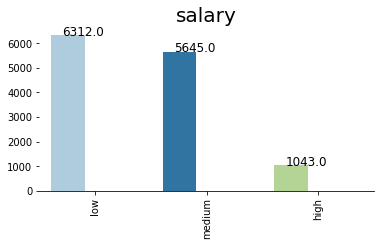

In [16]:
cat=[];numl=[]    
for feature in Train_data.columns.tolist():
    if Train_data[feature].dtype=='object':
        cat.append(feature)
    else:
        numl.append(feature)
for column in cat:
    def plot_categorical_count(Train_data, column, title='', limit=10,xtick_rotation='vertical'):
        column_count = Train_data[column].value_counts()#[:limit]
        fig = plt.figure(figsize=(6, 3))
        bar_width = 0.35
        ax=sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
        #ax.bar(x-bar_width, y, bar_width, fc='r', edgecolor='none')
        sns.despine(left=True)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=xtick_rotation)
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title(column,fontdict={'fontsize':20,'fontweight' :20,'verticalalignment': 'baseline'}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.3
            i.set_width(.3)
            i.set_x(i.get_x() + diff * .01)            
            ax.text(i.get_x()+0.1,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
    plt.show(plot_categorical_count(Train_data, column, title=column, limit=10))

Difference in Employee and Churner percentage in each categorical features

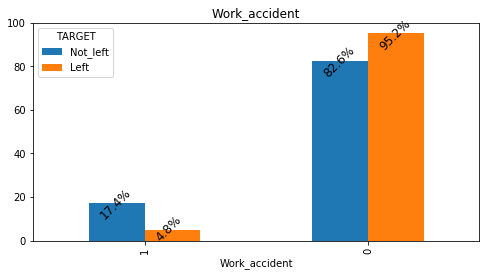

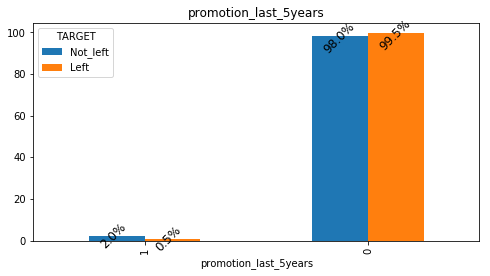

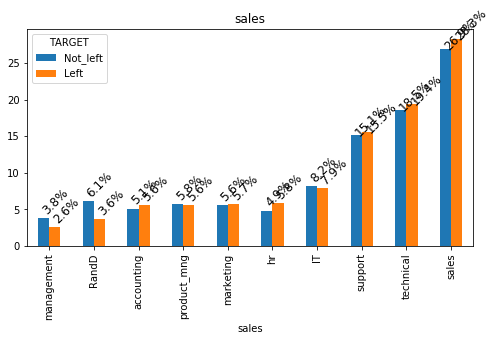

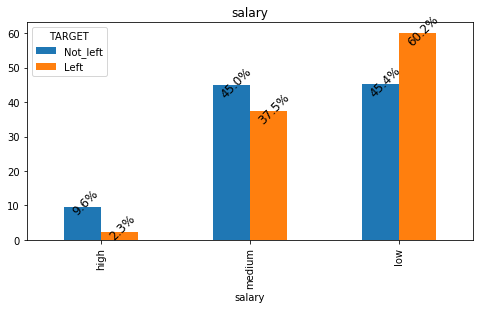

In [17]:
for name  in cat: 
    fnl=pd.crosstab(index=Train_data[name], columns=Train_data['TARGET'])
    fnl['Not_left']=np.round(fnl[0]/fnl[0].sum(),4)*100
    fnl['Left']=np.round(fnl[1]/fnl[1].sum(),4)*100
    okk=fnl[['Not_left','Left']].sort_values(by='Left')#,ascending=False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
    ax=okk[['Not_left','Left']].plot(kind='bar', figsize=(8,4),title=name,grid=False)#subplots=True
    #plt.annotate( label,  (okk.index,okk['one_class'].values),   xytext=(0, space), textcoords="offset points", ha='center', va=va)
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.04,i.get_height()+ 3,\
                str(round((i.get_height()/100)*100, 1))+'%', fontsize=12,color='black',rotation=45)
        #filename = 'C:\\Users\\tvimal\\Desktop\\' + str(name) +'.png'
        #plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')

Mean Difference of Employees and Churner in each Numeric Features

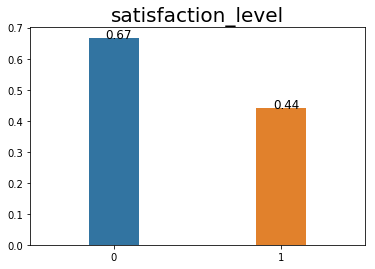

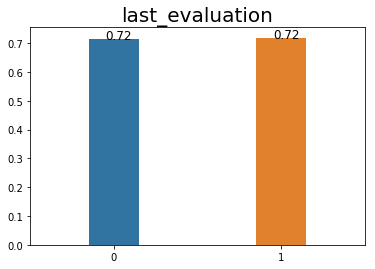

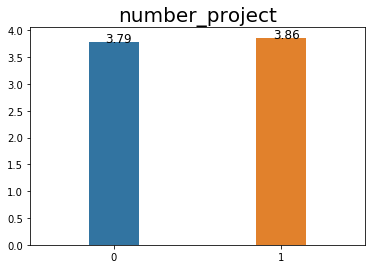

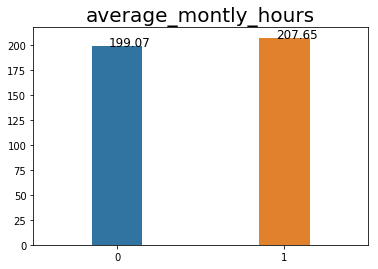

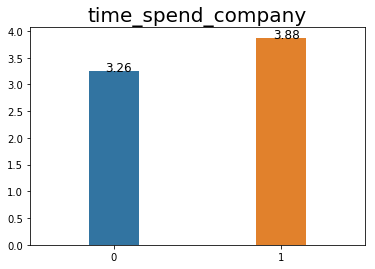

In [18]:
cat=[];numl=[]    
for feature in Train_data.columns.tolist():
    if Train_data[feature].dtype=='object':
        cat.append(feature)
    else:
        numl.append(feature)
numlist=numl
numlist.remove('TARGET')
for var in numlist:
    def means(var):
        dff=Train_data[[var,'TARGET']]
        g=dff.groupby('TARGET').agg('mean')
        dfs = pd.DataFrame(g, index=[0,1]).rename(columns={0:'MEAN_CONTROL_CLASS',1:'MEAN_ONE_CLASS'})
        ax=sns.barplot(x=dfs.index, y=np.array(dfs.values).ravel())
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title(var,fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.3
            i.set_width(.3)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.1,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
            #filename = 'C:\\Users\\tvimal\\Desktop\\' + str(var) +'.png'
            #plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')
    plt.show(means(var))

# Statistical Significance Test for Feature Selection

Chi_square test - Categorical Input features


In [19]:
Sigf_test=Train_data.drop('TARGET',axis=1)
Sigf_test.columns
cat=[]
numl=[]
    
for feature in Sigf_test.columns.tolist():
    if Sigf_test[feature].dtype=='object':
        cat.append(feature)
    else:
        numl.append(feature)
#####################################    chi square     ############################
chistat=[]
p_val=[]
for i in cat:
    chi_table = pd.crosstab(index=Train_data[i], columns=Train_data['TARGET'])
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(chi_table)
    #print( '%s ,chi_stat=%s ,p_value=%s' % (i,stat,p))
    chistat.append(stat)
    p_val.append(p)
    
chi=np.array(chistat)
p=np.array(p_val)
stat=np.column_stack((chi,p))
chi_stat=pd.DataFrame(stat).rename(columns={0:'CHI_STATS',1:"P_VALUE"})
chi_stat['INPUT_FEATURES']=list(cat)
chi_stat= chi_stat.set_index('INPUT_FEATURES')  # whole dataframe with non significant features
CONTRIBUT=chi_stat[chi_stat['P_VALUE']<0.01]  # set the threshold for  chi stat
con_feature=list(CONTRIBUT.index)
print ("TOTAL NUM OF CATEGORICAL INPUT_FEATURES=",len(cat))
print ("SIGNIFICANT CATEGORICAL_FEATURES=",len(CONTRIBUT))
print(CONTRIBUT)
con_feature  #list of contributed  features 
chi_stat
con_feature

TOTAL NUM OF CATEGORICAL INPUT_FEATURES= 4
SIGNIFICANT CATEGORICAL_FEATURES= 4
                        CHI_STATS       P_VALUE
INPUT_FEATURES                                 
Work_accident          275.253888  8.126194e-62
promotion_last_5years   27.687223  1.426015e-07
sales                   41.497184  4.060241e-06
salary                 269.332826  3.274310e-59


['Work_accident', 'promotion_last_5years', 'sales', 'salary']


F-Anova Test    - Numeric Input features

In [20]:
######################################## F ANOVA   ####################################################
NUM_LIST=[]
for num in numl:  
    from scipy.stats import ttest_ind
    from scipy import stats
    f_anova=Train_data[['TARGET',num]]#.groupby('TARGET').mean()
    f_anova.groupby('TARGET').mean()
    f_anova=f_anova.replace(np.nan,0);  f_anova=f_anova.replace(np.inf,0); f_anova=f_anova.replace(-np.inf,0)
    cat1 = f_anova[f_anova['TARGET']==0];  cat2 =f_anova[f_anova['TARGET']==1]
    stat=stats.f_oneway(cat1[num], cat2[num])
   # print(num,'      '  ,stats.f_oneway(cat1[num], cat2[num]))
    #print(num,'  ',stat)
    NUM_LIST.append(stat)
value=[]
for i in range(len(NUM_LIST)):
    value.append(list(NUM_LIST[i]))
f_stat=pd.DataFrame(value).rename(columns={0:'F_STATTISTIC',1:"P_VALUE"})
f_stat['INPUT_FEATURES']=list(numl)
f_stat= f_stat.set_index('INPUT_FEATURES')
CONTRIBUTE=f_stat[f_stat['P_VALUE']<0.01]     # set the  significant threshold for f stat
con_features=list(CONTRIBUTE.index)
print ("TOTAL NUM OF CONTINUOUS NUMBER_FEATURES=",len(numl))
print ("SIGNIFICANT CONTINUOUS NUMBER FEATURES=",len(CONTRIBUTE))
#con_features  #list of contributed  features 
print(CONTRIBUTE)

TOTAL NUM OF CONTINUOUS NUMBER_FEATURES= 5
SIGNIFICANT CONTINUOUS NUMBER FEATURES= 4
                      F_STATTISTIC        P_VALUE
INPUT_FEATURES                                   
satisfaction_level     2177.024761   0.000000e+00
number_project            8.953910   2.773962e-03
average_montly_hours     65.962883   5.007204e-16
time_spend_company      503.078221  2.385106e-109


# Multocollinearity  
 To reduce the overfit of the model & 
Spearman Correalation for ordinal numbers

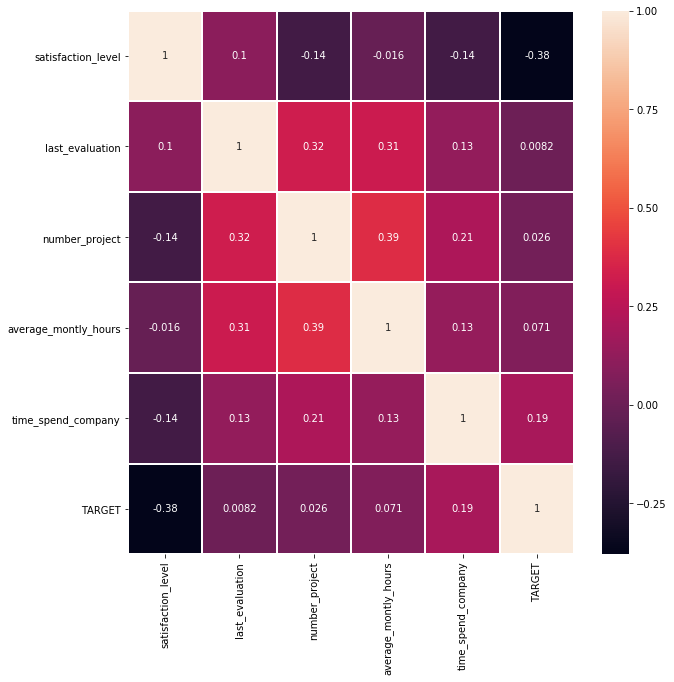

In [21]:
cor_matrix=Train_data.corr()
cor_matrix
plt.figure(figsize = (10,10))
sns.heatmap(cor_matrix, annot=True,linewidths=1)

 PREPROCESSING (Text to Numbers,Synthetic Sampling,Normalization)

In [22]:
Train_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,TARGET,promotion_last_5years,sales,salary
id,,,,,,,,,,
11094,0.45,0.63,5,111,5,0,0,0,management,medium
1095,0.11,0.77,6,275,4,0,1,0,accounting,low
12326,0.41,0.52,2,135,3,0,1,0,sales,low
9153,0.66,0.84,4,186,3,0,0,0,IT,medium
5806,0.40,0.64,3,188,3,0,0,0,support,low


In [23]:
Train_data.salary.value_counts()

low       6312
medium    5645
high      1043
Name: salary, dtype: int64

# Feature Engineering

In [24]:
Train_data['Satisfaction_cat'] = pd.cut(Train_data['satisfaction_level'], bins=[0, 0.5, 1, float('Inf')], labels=['Low', 'High','very_high'])
Train_data [['satisfaction_level', 'Satisfaction_cat']]
Train_data.loc[(Train_data['Satisfaction_cat'] =='Low') & (Train_data['salary'] =='low'), 'New_Satisfaction'] = 10
Train_data.loc[(Train_data['Satisfaction_cat'] == 'Low') & (Train_data['salary'] =='medium'), 'New_Satisfaction'] = 7.5
Train_data.loc[(Train_data['Satisfaction_cat'] =='High') & (Train_data['salary'] =='low'), 'New_Satisfaction'] = 5
Train_data.loc[(Train_data['Satisfaction_cat'] == 'High') & (Train_data['salary'] =='medium'), 'New_Satisfaction'] = 4
Train_data.loc[(Train_data['Satisfaction_cat'] =='Low') & (Train_data['salary'] =='high'), 'New_Satisfaction'] = 2
Train_data.loc[(Train_data['Satisfaction_cat'] == 'High') & (Train_data['salary'] =='high'), 'New_Satisfaction'] = 1
Train_data[['Satisfaction_cat','salary','New_Satisfaction']]
Train_data=Train_data[[ 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'TARGET', 'promotion_last_5years', 'sales', 'salary', 'New_Satisfaction']]
Train_data.head()#,

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,TARGET,promotion_last_5years,sales,salary,New_Satisfaction
id,,,,,,,,,,,
11094,0.45,0.63,5,111,5,0,0,0,management,medium,7.5
1095,0.11,0.77,6,275,4,0,1,0,accounting,low,10.0
12326,0.41,0.52,2,135,3,0,1,0,sales,low,10.0
9153,0.66,0.84,4,186,3,0,0,0,IT,medium,4.0
5806,0.40,0.64,3,188,3,0,0,0,support,low,10.0


In [25]:
Train_data
Model_inp=Train_data.drop(['TARGET'],axis=1)
x=pd.get_dummies(Model_inp)
print(Model_inp.shape)
#print(model_inp.columns.tolist())
y=Train_data['TARGET']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#normalizing the data
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)
#from imblearn.combine import SMOTEENN
# upsampling fro imbalanced dataset.
x_train_res,y_train_res=SMOTE().fit_sample(X_train, y_train)
n_cols=x_train_res.shape[1]
print("No of input features= ",n_cols)

(13000, 10)
No of input features=  23


In [26]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'New_Satisfaction',
       'Work_accident_0', 'Work_accident_1', 'promotion_last_5years_0',
       'promotion_last_5years_1', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

# LOGISTIC REGRESSION

In [81]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
logistic = linear_model.LogisticRegression()

penalty = ['l1', 'l2']
C = np.logspace(40, 2, 60)
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x_train_res,y_train_res)

#best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target 
y_pred_tes = best_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_tes ),'confusion_matrix')
print('testing_accuracy Log_REG =',(metrics.accuracy_score (y_test, y_pred_tes ))*100)
y_pred_train = best_model.predict(X_train)
print(confusion_matrix(y_train,y_pred_train),'confusion_matrix')
print('training_accuracy Log_REG =',(metrics.accuracy_score (y_train,y_pred_train))*100)

Best Penalty: l1
Best C: 1.1689518164985872e+38
[[1665  379]
 [  60  496]] confusion_matrix
testing_accuracy Log_REG = 83.11538461538461
[[6626 1547]
 [ 268 1959]] confusion_matrix
training_accuracy Log_REG = 82.54807692307692


Important Features by Logistic Regression

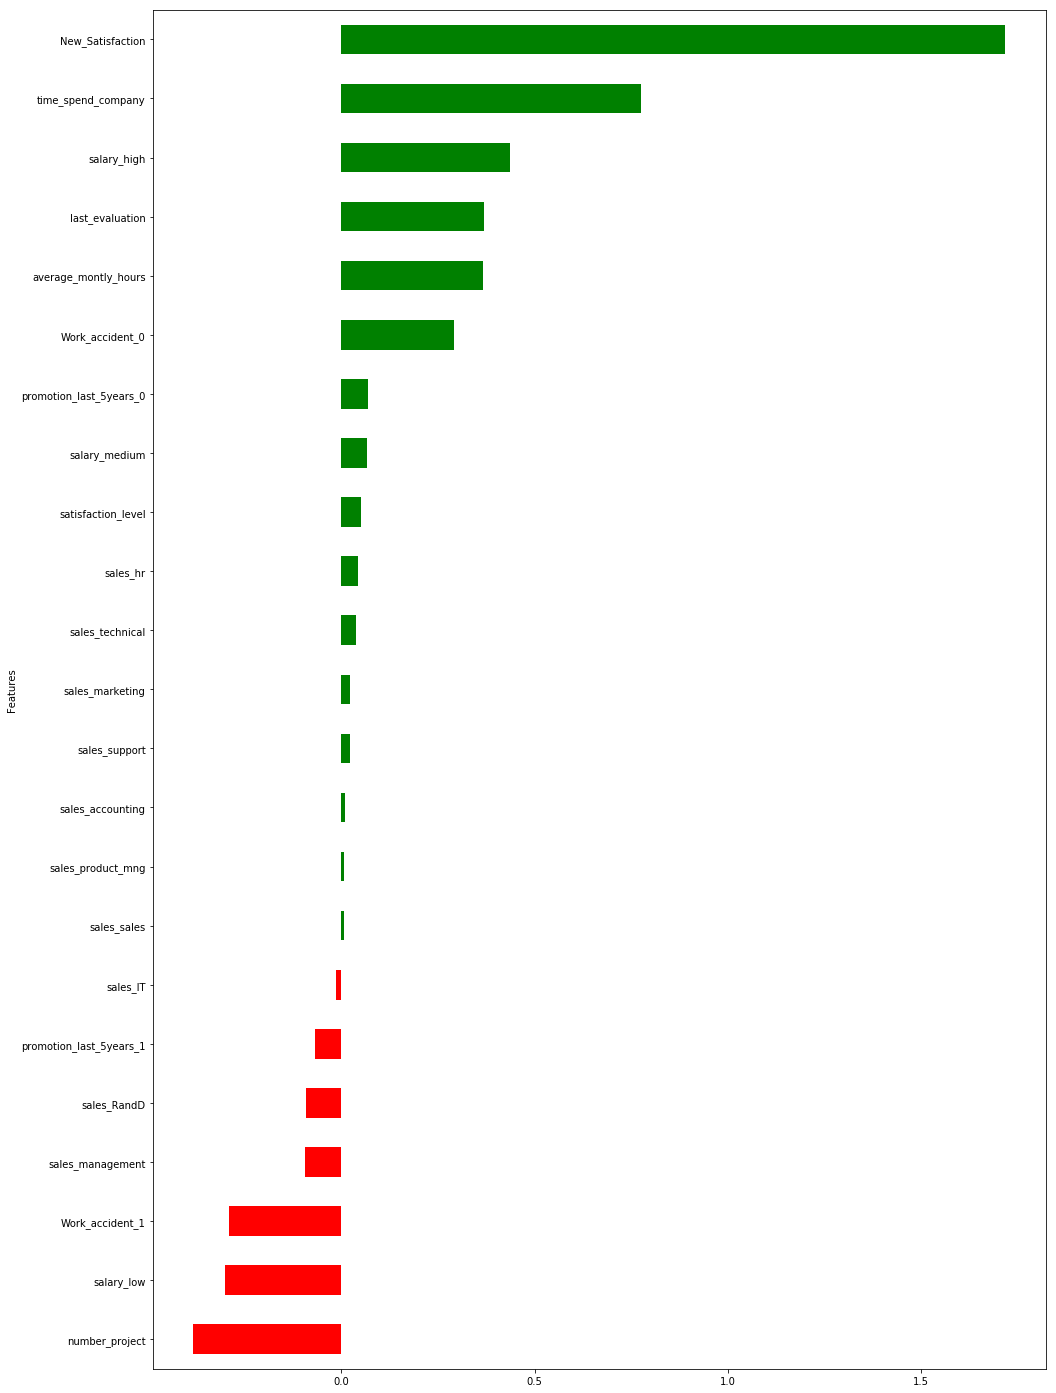

In [82]:
Log_reg=LogisticRegression(C=0.02)#
Log_reg.fit(x_train_res,y_train_res)
#feature impotance
coeff=Log_reg.coef_[0]
coef_df=pd.Series(coeff)
import matplotlib as plt
coeff = list(Log_reg.coef_[0])
labels = list(x.columns);features = pd.DataFrame()
features['Features'] = labels;features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(16, 25),color = features.positive.map({True: 'green', False: 'red'}))
#plt.xlabel('Importance')

# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import GridSearchCV
grid_params={'n_neighbors':[3,5,11,1]}
gs=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=3,n_jobs=-1)
gs.fit(x_train_res,y_train_res)
res=gs.predict(X_test)
print(metrics.accuracy_score (y_test, res)*100)
rest=gs.predict(X_train)
print(metrics.accuracy_score (y_train, rest)*100)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.0s finished


94.61538461538461
100.0


# Naive Bayes

In [84]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
model.fit(x_train_res,y_train_res)
#Predict Output
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print( "Predicted Value:", predicted)
print(metrics.accuracy_score (y_test, predicted )*100)
predicte= model.predict(X_train)
print(metrics.accuracy_score (y_train, predicte)*100)

Predicted Value: [1 0 0 ... 1 1 1]
51.30769230769231
50.70192307692307


# RANDOM FOREST

In [63]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_res, y_train_res)

print(rf_random.best_params_)
# Predict target 
y_pred_tes = rf_random.predict(X_test)
print(confusion_matrix(y_test,y_pred_tes ),'confusion_matrix')
print('testing_accuracy Log_REG =',(metrics.accuracy_score (y_test, y_pred_tes ))*100)
y_pred_train =  rf_random.predict(X_train)
print(confusion_matrix(y_train,y_pred_train),'confusion_matrix')
print('training_accuracy Log_REG =',(metrics.accuracy_score (y_train,y_pred_train))*100)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


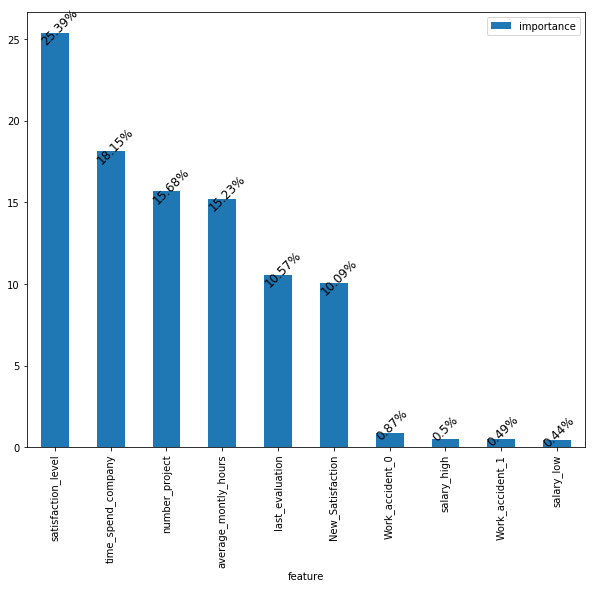

In [88]:
#Feature selection
from sklearn.ensemble import RandomForestClassifier

names = Train_data.columns
rf = RandomForestClassifier().fit(x_train,y_train)
rf.fit(x_train,y_train)
#print ("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),names),reverse=True))
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rf.feature_importances_,4)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
ax=importances.iloc[:10,:].plot.bar(figsize=(10,8))
#plt.figure(figsize=(30,25))
#importances
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03,i.get_height()+1,\
            str(round((i.get_height()/100)*100, 2))+'%', fontsize=12,color='black',rotation=45)#total)*100

# XGBOOST

In [27]:
# xgb 
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.6)

xgb_clf.fit(x_train_res, y_train_res)
y_pred_ts = xgb_clf.predict(X_test)
#y_score = xgb_clf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test,y_pred_ts),'confusion_matrix')
print('testing_accuracy XGB =',(metrics.accuracy_score (y_test, y_pred_ts ))*100)
y_pred_training =  xgb_clf.predict(X_train)
print(confusion_matrix(y_train,y_pred_training),'confusion_matrix')
print('training_accuracy XGB=',(metrics.accuracy_score (y_train,y_pred_training))*100)
print(accuracy_score(y_test,y_pred_ts))
#print(classification_report(y_test,y_pred_ts))
#model_performance_plot('xgb_clf')

[[2031   20]
 [  47  502]] confusion_matrix
testing_accuracy XGB = 97.42307692307692
[[8095   71]
 [ 145 2089]] confusion_matrix
training_accuracy XGB= 97.92307692307692
0.9742307692307692


C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


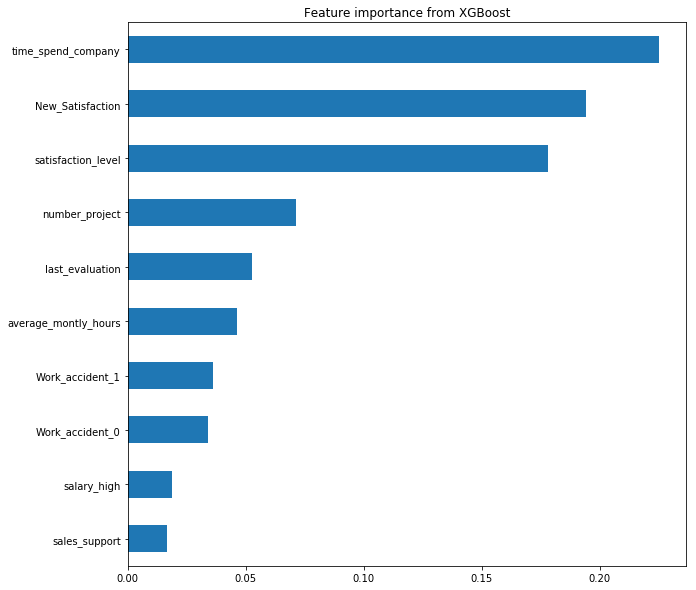

In [29]:
pd.Series(xgb_clf.feature_importances_, index = x.columns).nlargest(10).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from XGBoost').invert_yaxis();

# MODEL EVALUATION

COnfusion-matrix,Precision_recall Curve,Gain Curve,Lift Curve

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


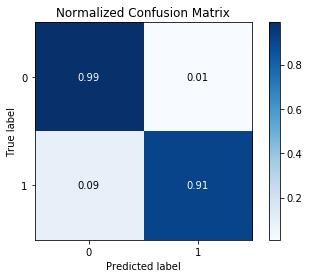

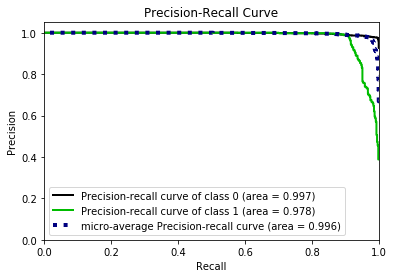

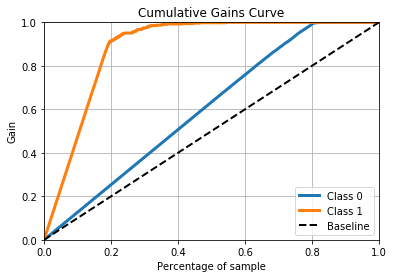

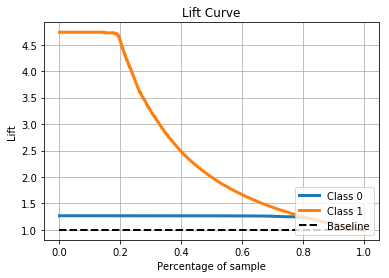

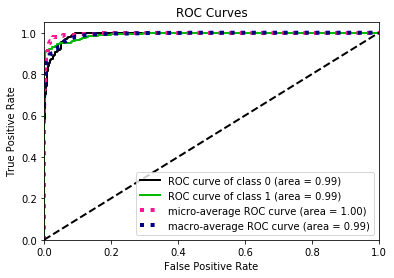

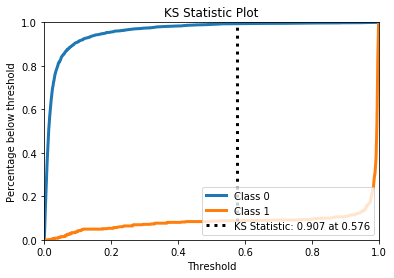

In [30]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_ts, normalize=True)


y_pred_test  =xgb_clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_test)

skplt.metrics.plot_cumulative_gain(y_test,y_pred_test)
skplt.metrics.plot_lift_curve(y_test,y_pred_test)
skplt.metrics.plot_roc (y_test,y_pred_test)
y_pred_test  = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_test)



(0, 1)

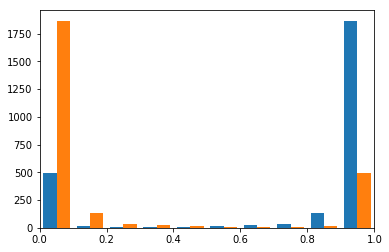

In [32]:
#we can seethe probability of the predicted values
import matplotlib.pyplot as plt
plt.rcParams['font.size']=10
#histogram
plt.hist(y_pred_test,bins=10)
plt.xlim(0,1)

# SCORING NEW DATA

# Verifying Distribution of Training And Test Data

In [33]:
Train_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,TARGET
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,0.618806,0.716709,3.804077,200.909769,3.390000,0.214077
std,0.246630,0.170237,1.209814,49.484224,1.312204,0.410196
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000
25%,0.450000,0.560000,3.000000,156.000000,3.000000,0.000000
50%,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000
75%,0.820000,0.870000,5.000000,244.000000,4.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000


In [33]:
Score_Data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,New_Satisfaction
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,0.573992,0.712151,3.796398,201.964482,4.202101,0.128564,0.052526,5.914957
std,0.257979,0.177102,1.371841,52.834001,2.056552,0.334801,0.223142,2.726620
min,0.090000,0.360000,2.000000,97.000000,2.000000,0.000000,0.000000,1.000000
25%,0.400000,0.540000,3.000000,153.000000,3.000000,0.000000,0.000000,4.000000
50%,0.590000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,5.000000
75%,0.790000,0.870000,5.000000,250.000000,5.000000,0.000000,0.000000,7.500000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,10.000000


Scoring New Data

In [31]:
Score_Data=pd.read_csv('C:\\Users\\tvimal\\Desktop\\hays\\hr_attrition_test.csv')
Score_Data=Score_Data.set_index('id')
Score_Data['Work_accident']=Score_Data['Work_accident'].astype(object)
Score_Data['promotion_last_5years']=Score_Data['promotion_last_5years'].astype(object)
print(Score_Data.shape)
Score_Data['Satisfaction_cat'] = pd.cut(Score_Data['satisfaction_level'], bins=[0, 0.5, 1, float('Inf')], labels=['Low', 'High','very_high'])
Score_Data [['satisfaction_level', 'Satisfaction_cat']]
Score_Data.loc[(Score_Data['Satisfaction_cat'] =='Low') & (Score_Data['salary'] =='low'), 'New_Satisfaction'] = 10
Score_Data.loc[(Score_Data['Satisfaction_cat'] == 'Low') & (Score_Data['salary'] =='medium'), 'New_Satisfaction'] = 7.5
Score_Data.loc[(Score_Data['Satisfaction_cat'] =='High') & (Score_Data['salary'] =='low'), 'New_Satisfaction'] = 5
Score_Data.loc[(Score_Data['Satisfaction_cat'] == 'High') & (Score_Data['salary'] =='medium'), 'New_Satisfaction'] = 4
Score_Data.loc[(Score_Data['Satisfaction_cat'] =='Low') & (Score_Data['salary'] =='high'), 'New_Satisfaction'] = 2
Score_Data.loc[(Score_Data['Satisfaction_cat'] == 'High') & (Score_Data['salary'] =='high'), 'New_Satisfaction'] = 1
Score_Data[['Satisfaction_cat','salary','New_Satisfaction']]
Score_Data=Score_Data[[ 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary', 'New_Satisfaction']]
Score_Data.head()
# imputation for outliers removal
sd1_cat=[];sd1_numl=[]    
for feature in Score_Data.columns.tolist():
    if Score_Data[feature].dtype=='object':
        sd1_cat.append(feature)
    else:
        sd1_numl.append(feature)
#sd1_cat=[feature  for feature in Score_Data.columns.tolist() if Score_Data[feature].dtype=='object' ]
#sd1_numl=[feature  for feature in Score_Data.columns.tolist() if Score_Data[feature].dtype!='object' ]
#imputation 
Score_Data[sd1_numl] = Imputer(strategy='mean').fit_transform(Score_Data[sd1_numl])
Score_Data= Score_Data.fillna(Score_Data.mode().iloc[0])

score_data=pd.get_dummies(Score_Data)# scaps
# Get missing columns in the training test(x values should be in production template)
missing_cols = set( x.columns ) - set( score_data.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    score_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
score_data = score_data[x.columns]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
score_data=sc.fit_transform(score_data)
print("backtest input shape",score_data.shape)

##########scoring new data
xgb = xgb_clf.predict(score_data)
xgb_prob = xgb_clf.predict_proba(score_data)
proba=(((xgb_prob[:,1])>0.75)*1).ravel()
print(pd.Series(proba).value_counts())
proba

(1999, 9)
backtest input shape (1999, 23)
0    1134
1     865
dtype: int64


C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 0, ..., 1, 1, 1])

In [32]:
XGB_data=pd.DataFrame({'ID':Score_Data.index,'Model_Probability':xgb_prob[:,1],'Target':proba})
XGB_data=XGB_data.set_index('ID')
XGB_data.to_excel('C:\\Users\\tvimal\\Desktop\\hays\\HAYS_ASSIGNMENT.xlsx')

END